ID: 20201474201

Name: Amr Ibrahim Mohammed Sheta<br>
عمرو إبراهيم محمد شتا


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_copy = pd.read_csv(
    r"C:\Users\amrsh\Downloads\RetailDataIII\RetailDataIII.csv", low_memory=False)

In [3]:
data = data_copy
data.head(5)

,Bill,MerchandiseID,Product,Quota,BillDate,Amount,CustomerID,Country
0,532657,21314,Small glass heart trinket pot,12,2018-11-14,4.10,14562.0,United Kingdom
1,563214,22383,Lunch bag suki design,2,2019-8-14,3.65,16370.0,United Kingdom
2,507597,22561,Wooden school colouring set,12,2018-5-10,3.65,17700.0,United Kingdom
3,491634,21588,Retro spot giant tube matches,1,2017-12-11,4.55,17841.0,United Kingdom
4,496007,85232B,Set/3 russian doll stacking tins,3,2018-1-28,6.95,15203.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Bill           1067371 non-null  object 
 1   MerchandiseID  1067371 non-null  object 
 2   Product        1062989 non-null  object 
 3   Quota          1067371 non-null  int64  
 4   BillDate       1067371 non-null  object 
 5   Amount         1067371 non-null  float64
 6   CustomerID     824364 non-null   float64
 7   Country        1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
data.describe()

,Quota,Amount,CustomerID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,6.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359236e+04,12346.000000
25%,1.000000e+00,3.250000e+00,13975.000000
50%,3.000000e+00,4.100000e+00,15255.000000
75%,1.000000e+01,6.150000e+00,16797.000000
max,8.099500e+04,3.897200e+04,18287.000000


<AxesSubplot:>

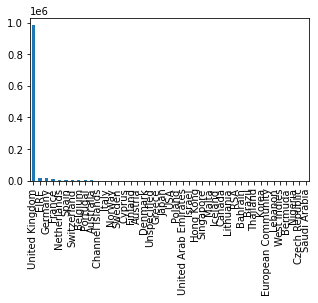

In [21]:
data_copy["Country"].value_counts().plot(figsize=(5, 3), kind="bar")

In [7]:
data = data[(data["Country"] == "United Kingdom") &
            (data["Amount"] > 0) & (data["Quota"] > 0)]

In [8]:
data = data.dropna(subset=['CustomerID'])
data["CustomerID"] = data["CustomerID"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725296 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Bill           725296 non-null  object 
 1   MerchandiseID  725296 non-null  object 
 2   Product        725296 non-null  object 
 3   Quota          725296 non-null  int64  
 4   BillDate       725296 non-null  object 
 5   Amount         725296 non-null  float64
 6   CustomerID     725296 non-null  int32  
 7   Country        725296 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 47.0+ MB


In [9]:
pd.options.mode.chained_assignment = None  # default='warn'
data["BillDate"] = pd.to_datetime(data.loc[:, "BillDate"])

In [10]:
data["Price"] = data["Quota"]*data["Amount"]
data.head()

,Bill,MerchandiseID,Product,Quota,BillDate,Amount,CustomerID,Country,Price
0,532657,21314,Small glass heart trinket pot,12,2018-11-14,4.10,14562,United Kingdom,49.20
1,563214,22383,Lunch bag suki design,2,2019-08-14,3.65,16370,United Kingdom,7.30
2,507597,22561,Wooden school colouring set,12,2018-05-10,3.65,17700,United Kingdom,43.80
3,491634,21588,Retro spot giant tube matches,1,2017-12-11,4.55,17841,United Kingdom,4.55
4,496007,85232B,Set/3 russian doll stacking tins,3,2018-01-28,6.95,15203,United Kingdom,20.85


# Aggregation (lambda) function importance:

1- The groupby function returns that data as a groupby object that condenses the data of the parameter
    given to it in this object<br><br>
2- The only way this object can be converted again to our wanted dataframe is by using agg function 
    which operate on the groupby object via lambda functions (which are a faster way to make a normal function)
    returning one value from the condensed data.<br><br>
For example:<br> 1- it can be used to get the number of items in every bill in the data set <br>
ex = data.groupby("Bill")<br>
ex = ex.agg("Product": lambda x: len(x))<br><br>
2- it can get what country was the leading buyer<br>
ex = data.groupby("Country")<br>
ex = ex.agg("Price": lambda x: x.sum())<br><br>
3- it can get how many items where sold from each product <br>
ex = data.groupby("MerchandiseID")<br>
ex = ex.agg("Quota": lambda x: x.sum())<br>

In [11]:
from datetime import timedelta
rfm = data.groupby("CustomerID")
rfm = rfm.agg({"BillDate": lambda x: ((data["BillDate"].max()+timedelta(1))-x.max()).days,
               "Price": lambda x: (x.sum()),
               "Bill": lambda x: len(x)})
rfm.head()

,BillDate,Price,Bill
CustomerID,,,
12346,326,226126.46,34
12608,405,1061.79,16
12745,487,1657.85,22
12746,541,448.55,17
12747,3,14792.54,257


In [12]:
rfm.describe()

,BillDate,Price,Bill
count,5353.000000,5353.000000,5353.000000
mean,203.683729,6007.994305,135.493368
std,210.120997,24087.635779,325.997871
min,1.000000,4.950000,1.000000
25%,26.000000,729.080000,20.000000
50%,99.000000,1820.050000,53.000000
75%,382.000000,4893.600000,142.000000
max,739.000000,985501.650000,12890.000000


In [13]:
rfm.columns = ["Recency", "Monetary", "Frequency"]

In [14]:
rfm["r_quartile"] = pd.qcut(rfm["Recency"], 4, [1, 2, 3, 4])
rfm["f_quartile"] = pd.qcut(rfm["Frequency"], 4, [4, 3, 2, 1])
rfm["m_quartile"] = pd.qcut(rfm["Monetary"], 4, [4, 3, 2, 1])
rfm.head()

,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,326,226126.46,34,3,3,1
12608,405,1061.79,16,4,4,3
12745,487,1657.85,22,4,3,3
12746,541,448.55,17,4,4,4
12747,3,14792.54,257,1,1,1


In [15]:
rfm["r_quartile"], rfm["f_quartile"], rfm["m_quartile"] = rfm["r_quartile"].astype(
    int), rfm["f_quartile"].astype(int), rfm["m_quartile"].astype(int)
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5353 entries, 12346 to 18287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     5353 non-null   int64  
 1   Monetary    5353 non-null   float64
 2   Frequency   5353 non-null   int64  
 3   r_quartile  5353 non-null   int32  
 4   f_quartile  5353 non-null   int32  
 5   m_quartile  5353 non-null   int32  
dtypes: float64(1), int32(3), int64(2)
memory usage: 230.0 KB


In [16]:
rfm["Customer_Seqmentation"] = rfm["r_quartile"] * \
    100 + rfm["f_quartile"]*10 + rfm["m_quartile"]
rfm = rfm.sort_values("Customer_Seqmentation")
rfm.head(5)

,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile,Customer_Seqmentation
CustomerID,,,,,,,
14060,5,25757.08,270,1,1,1,111
15861,13,12121.79,798,1,1,1,111
14739,5,32631.50,256,1,1,1,111
14735,4,21266.16,366,1,1,1,111
17758,20,11484.53,536,1,1,1,111


In [17]:
rfm.tail(3)

,Recency,Monetary,Frequency,r_quartile,f_quartile,m_quartile,Customer_Seqmentation
CustomerID,,,,,,,
14751,685,256.45,7,4,4,4,444
14728,414,326.58,14,4,4,4,444
15564,464,154.74,4,4,4,4,444
